In [1]:
import pandas as pd
import zipfile
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df_2021 = pd.read_csv(zipfile.ZipFile('raw_data/TRK_13139_FY2021.zip', 'r').open('TRK_13139_FY2021.csv'))
df_2022 = pd.read_csv(zipfile.ZipFile('raw_data/TRK_13139_FY2022.zip', 'r').open('TRK_13139_FY2022.csv'))
df_2023 = pd.read_csv(zipfile.ZipFile('raw_data/TRK_13139_FY2023.zip', 'r').open('TRK_13139_FY2023.csv'))
df_2024_multi = pd.read_csv(zipfile.ZipFile('raw_data/TRK_13139_FY2024_multi_reg.zip', 'r').open('TRK_13139_FY2024_multi_reg.csv'))
df_2024_single = pd.read_csv(zipfile.ZipFile('raw_data/TRK_13139_FY2024_single_reg.zip', 'r').open('TRK_13139_FY2024_single_reg.csv'))

# Shape of each dataframe

In [3]:
df_2021.shape, df_2022.shape, df_2023.shape, df_2024_multi.shape, df_2024_single.shape

((269424, 56), (301447, 56), (474421, 56), (408891, 56), (350103, 56))

# Verify that the datasets have the same column names

In [4]:
cols_2021 = set(df_2021.columns)
cols_2022 = set(df_2022.columns)
cols_2023 = set(df_2023.columns)
cols_2024_multi = set(df_2024_multi.columns)
cols_2024_single = set(df_2024_single.columns)

# Check if all column sets are equal
if cols_2021 == cols_2022 == cols_2023 == cols_2024_multi == cols_2024_single:
    print("Same column names.")
else:
    print("Different column names.")

Same column names.


# Read in and display Data Dictionary

In [5]:
data_dict = pd.read_excel('preprocessed_data/TRK_13139_I129_H1B_Registrations_FY21_FY24_FOIA_FIN.xlsx', sheet_name = 'Data Dictionary')

# Check difference in shape between original columns listed in data dict and columns that exist in data dict and actual dataset
print(data_dict.loc[:55, :].shape, data_dict.loc[:55, :][lambda df: df['Column'].isin(cols_2021)].shape)

# Set differences between data dict columns and data dict columns existing in H1B dataset
print(f"Data dictionary columns that don't exist in H1B dataset: {set(data_dict.loc[:55, :]['Column']) - set(data_dict.loc[:55, :][lambda df: df['Column'].isin(cols_2021)]['Column'])}")
print(f"H1B Dataset columns that do not exist in data dictionary: {set(df_2021.columns) - set(data_dict.loc[:55, :]['Column'])}")
print()
# Print out the columns that do not exist in data dictionary:
print("H1B Dataset columns that do not exist in data dictionary:")
for col in cols_2021:
    if col not in np.array(data_dict.loc[:55, :]['Column']):
        print(f"    {col}")

# Seems like that they do exist but data dict cols are uppercase and dataset cols are lowercase.
data_dict.loc[:55, :][lambda df: df['Column'].isin(cols_2021)].sort_values(by = 'Column')

(56, 2) (52, 2)
Data dictionary columns that don't exist in H1B dataset: {'FIRST_DECISION_DATE', 'VALID_FROM', 'VALID_TO', 'REC_DATE'}
H1B Dataset columns that do not exist in data dictionary: {'valid_from', 'rec_date', 'first_decision_date', 'valid_to'}

H1B Dataset columns that do not exist in data dictionary:
    valid_to
    valid_from
    rec_date
    first_decision_date


,Column,Description
27,BASIS_FOR_CLASSIFICATION,"Basis for Classification, as provided by the p..."
50,BEN_COMP_PAID,Beneficiary's rate of pay per year
31,BEN_COUNTRY_OF_BIRTH,Beneficiary's country of birth
32,BEN_CURRENT_CLASS,Beneficiary's current classification
47,BEN_EDUCATION_CODE,Beneficiary's education code
49,BEN_PFIELD_OF_STUDY,Beneficiary's field of study
30,BEN_SEX,Beneficiary's gender
34,DOL_ETA_CASE_NUMBER,Unique identifier for the DOL ETA Case.
51,DOT_CODE,Beneficiary's job code\nRefer to descriptions ...
48,ED_LEVEL_DEFINITION,Beneficiary's education definition (descript t...


In [6]:
col_names = data_dict.loc[:55, :][lambda df: df['Column'].isin(cols_2021)].to_dict(orient = 'list')['Column']
descriptions = data_dict.loc[:55, :][lambda df: df['Column'].isin(cols_2021)].to_dict(orient = 'list')['Description']

for i in range(len(col_names)):
    print(f"({i+1}): {col_names[i]}: {descriptions[i]}" )

(1): bcn: Beneficiary confirmation number. Unique ID for each registration submitted
(2): country_of_birth: Beneficiary's country of birth
(3): country_of_nationality: Beneficiary's country of nationality
(4): ben_date_of_birth: Beneficiary's date of birth
(5): ben_year_of_birth: Beneficiary's year of birth
(6): gender: Beneficiary's gender
(7): employer_name: Employer name for registration
(8): FEIN: Employer's tax number
(9): mail_addr: Employer's mailing address
(10): city: Employer's city
(11): state: Employer's state
(12): zip: Employer's zip code
(13): agent_first_name: First name of registered agent
(14): agent_last_name: Last name of registered agent
(15): lottery_year: Lottery year of registration
(16): status_type: Status of the registration. "Selected" means the registration was selected in the lottery. "Created" or "Eligible" means the registration was not selected in the lottery.
(17): ben_multi_reg_ind: Indicator of multiple registrations for beneficiary (a value of 1 rep

# What is the difference between multi and single registrations in 2024?

# Q: Which factors contribute most to the approval / denial of a H1B petition once it has been selected from the lottery?
Applicants are only approved or denied from an H1B petition after they were selected from the lottery. Therefore we are only interested in observations that have the **"Selected"** status type.

In [7]:
df_2023['WAGE_UNIT'].unique()

array([nan, 'YEAR', 'HOUR', 'MONTH', 'WEEK', '(b)(3) (b)(6) (b)(7)(c)'],
      dtype=object)

In [8]:
selected_status_condition = lambda df: df['status_type'] == 'SELECTED'

df_2021 = df_2021[selected_status_condition]
df_2022 = df_2022[selected_status_condition]
df_2023 = df_2023[selected_status_condition]
df_2024_multi = df_2024_multi[selected_status_condition]
df_2024_single = df_2024_single[selected_status_condition]

# Print new shapes of each dataset after filtering
df_2021.shape, df_2022.shape, df_2023.shape, df_2024_multi.shape, df_2024_single.shape

((124368, 56), (131896, 56), (127563, 56), (103060, 56), (85304, 56))

# Come up with columns of interest via intuition

**FIRST_DECISION** (outcome Y): The first decision of the petition, which indicates whether it was approved or denied.

**FIRST_DECISION_DATE**: The date of the first decision, which might provide insights into processing times.

**employer_name**: The name of the employer, which could be relevant in understanding the employer's influence on the decision.

**JOB_TITLE**: The job title of the beneficiary, which can indicate the type of job being offered.

**WAGE_AMT**: The wage amount offered to the beneficiary, which is a critical factor in the decision.

**WORKSITE_STATE**: The state where the beneficiary will work, as certain locations might have different approval rates.

**BEN_EDUCATION_CODE**: The education level of the beneficiary, which might influence the decision.

**BEN_PFIELD_OF_STUDY**: The field of study of the beneficiary, which can be relevant to the job being offered.

**FULL_TIME_IND**: Indicator for a full-time role, which might affect the decision.

**NUM_OF_EMP_IN_US**: The number of employees in the US for the petitioner, which might indicate the size and stability of the employer.

In [9]:
# Ignore the above that was an initial draft. the following list shows a new version of main_features to use. See slides for description of these features
main_features = ['gender', 'country_of_nationality', 'employer_name', 'WAGE_AMT', 'WAGE_UNIT', 'JOB_TITLE', 'WORKSITE_STATE', 'ED_LEVEL_DEFINITION', 'BEN_PFIELD_OF_STUDY', 'FIRST_DECISION']

# Combine H1B datasets from 2021-2024 + Get Summary Statistics

In [10]:
entire_df = pd.concat([df_2021, df_2022, df_2023, df_2024_multi, df_2024_single])

In [ ]:
# Count of non-null values for each column; includes distinct columns, and the most frequent class in each column

# Generate non-null, unique counts for each feature. Also show most frequent feature category and its corresponding count
entire_df[main_features].describe()

,gender,country_of_nationality,employer_name,WAGE_AMT,WAGE_UNIT,JOB_TITLE,WORKSITE_STATE,ED_LEVEL_DEFINITION,BEN_PFIELD_OF_STUDY,FIRST_DECISION
count,572191,572191,572190,186135,186162,247811,376260,311261,376176,374903
unique,2,188,71081,31208,4,55276,54,10,41353,2
top,male,IND,Amazon.com Services LLC,90000,YEAR,SOFTWARE ENGINEER,CA,MASTER'S DEGREE,COMPUTER SCIENCE,Approved
freq,388850,425302,14470,2270,176363,19255,72490,155012,47638,363843


# Visualize class distribution of features

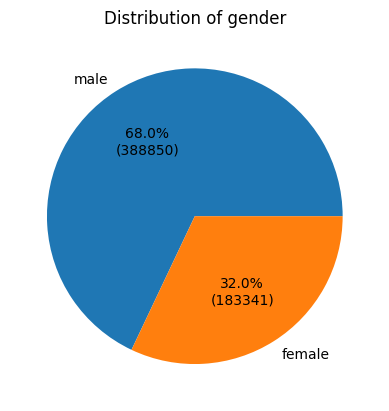

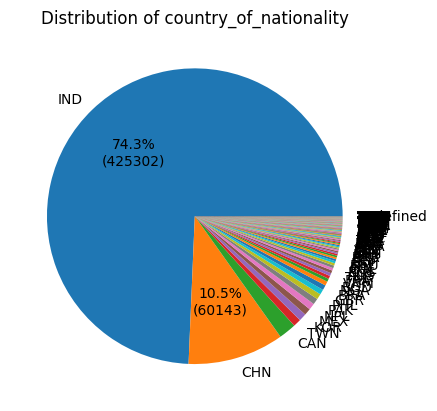

Feature employer_name has 71081 categories. Skipping visualization...
Feature WAGE_AMT has 31208 categories. Skipping visualization...
Feature JOB_TITLE has 55276 categories. Skipping visualization...


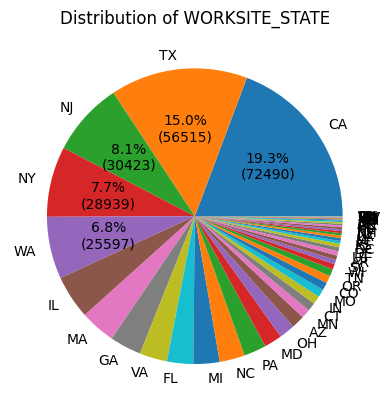

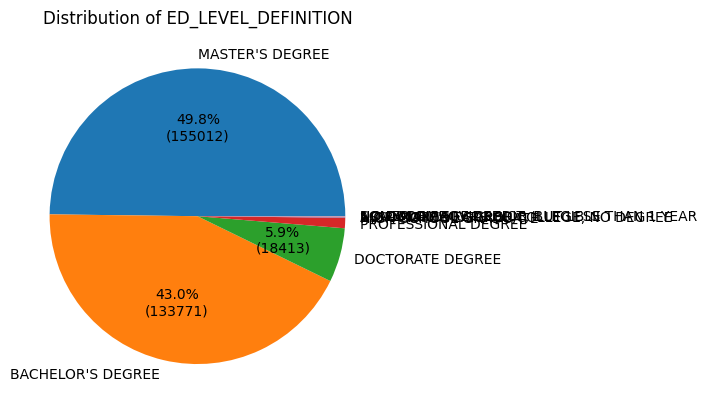

Feature BEN_PFIELD_OF_STUDY has 41353 categories. Skipping visualization...


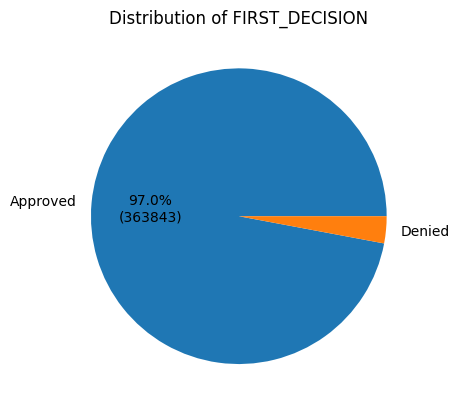

In [13]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))

        # Don't return anything if the percentage is less than ...
        if float('{:.1f}'.format(pct, v=val)) < 5:
            return None
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

for feature in main_features:
    # display(entire_df[feature].value_counts())
    s = entire_df[feature].value_counts()
    if s.shape[0] >= 200:
        print(f"Feature {feature} has {s.shape[0]} categories. Skipping visualization...")
        continue
    if feature not in ['WAGE_AMT', 'WAGE_UNIT']:
        plt.pie(s,labels = s.index, autopct=autopct_format(s))
        plt.title(f'Distribution of {feature}')
        plt.show()

# Count Missing Values

In [ ]:
# Count Missing Values 
entire_df_missing_vals = pd.DataFrame(entire_df[main_features].isna().sum()).reset_index().rename(columns = {"index": "Feature", 0: 'Total Missing Values'})
entire_df_missing_vals['Percentage'] = np.round((entire_df_missing_vals['Total Missing Values'] / entire_df.shape[0]) * 100, 2)
entire_df_missing_vals

In [ ]:
# Write intermediate datasets to CSV files
df_2021.to_csv('preprocessed_data/FY2021_cleaned_H1B.csv')
df_2022.to_csv('preprocessed_data/FY2022_cleaned_H1B.csv')
df_2023.to_csv('preprocessed_data/FY2023_cleaned_H1B.csv')
df_2024_multi.to_csv('preprocessed_data/FY2024_multi_reg_cleaned_H1B.csv')
df_2024_single.to_csv('preprocessed_data/FY2024_single_reg_cleaned_H1B.csv')

**Your slides should include**:
- Title, Authors

- What is the question you will be working on? Why is it interesting?


- What is the data you will be using? Include data source, size of dataset, main features to be used. Please also include summary statistics of your data.


- What prediction algorithms do you plan to use? Please describe them in detail?


- How will you evaluate your results? Please describe your chosen performance metrics and/or statistical tests in detail

In [79]:
df_2024_single['FIRST_DECISION'].unique()

array(['Denied', 'Approved', nan], dtype=object)

In [46]:
df_2021[['BEN_EDUCATION_CODE', 'ED_LEVEL_DEFINITION']].drop_duplicates()

,BEN_EDUCATION_CODE,ED_LEVEL_DEFINITION
2,G,MASTER'S DEGREE
11,F,BACHELOR'S DEGREE
13,NaN,NaN
46,I,DOCTORATE DEGREE
441,H,PROFESSIONAL DEGREE
1366,A,NO DIPLOMA
1775,B,HIGH SCHOOL GRADUATE
5686,D,"1 OR MORE YEARS OF COLLEGE, NO DEGREE"
7295,E,ASSOCIATE'S DEGREE
132112,J,NO CODE PROVIDED OR ILLEGIBLE


In [50]:
df_2021[['country_of_nationality']].drop_duplicates()

,country_of_nationality
2,CAN
4,IND
9,CHN
12,VNM
24,GHA
...,...
196840,XKS
219116,LUX
220904,MOZ
236680,SOM


In [54]:
df_2021.head().drop(columns = ['bcn', 'country_of_birth', 'ben_date_of_birth', 'FEIN', 'mail_addr', 'city', 'S1Q1B', 'BEN_EDUCATION_CODE'])

,country_of_nationality,ben_year_of_birth,gender,employer_name,state,zip,agent_first_name,agent_last_name,lottery_year,status_type,...,NUM_OF_EMP_IN_US,S1Q1A,ED_LEVEL_DEFINITION,BEN_PFIELD_OF_STUDY,BEN_COMP_PAID,DOT_CODE,NAICS_CODE,S3Q1,S4Q1,T_U_VAWA_FLAG
2,CAN,1988,male,"Tesla, Inc.",CA,94304-1317,Shannon,Napier Barnes,2021,SELECTED,...,0,N,MASTER'S DEGREE,COMPUTER ENGINEERING,125000,007,336111,B,N,NaN
4,IND,1990,male,XENON INFOTEK INC,NJ,08817-2436,AMITA,MISHRA,2021,SELECTED,...,0,Y,MASTER'S DEGREE,COMPUTER SCI,93496,NaN,541511,B,Y,NaN
5,IND,1994,male,"MICROSILICON, INC.",TX,77042-2829,OMAR,KULBRANDSTAD,2021,SELECTED,...,0,N,MASTER'S DEGREE,ELECTRICAL ENGINEERING,100000,003,541330,B,N,NaN
6,IND,1994,female,Genpact LLC,NJ,07078-2704,Abhishek,Byrapogula,2021,SELECTED,...,0,N,MASTER'S DEGREE,INFORMATION SYSTEMS,73798,030,54161,B,Y,NaN
7,IND,1996,male,"DEW SOFTWARE, INC.",CA,94539-6118,Suresh,Deopura,2021,SELECTED,...,47,Y,MASTER'S DEGREE,COMPUTER SCIENCE,85842,030,541511,B,Y,NaN


In [70]:
df_2021[['gender']].isna().sum()

gender    0
dtype: int64

In [62]:
df_2021[['BEN_COMP_PAID', 'WAGE_AMT']].isna().sum()

BEN_COMP_PAID     24390
WAGE_AMT         124368
dtype: int64

In [65]:
df_2022.shape, df_2022[['BEN_COMP_PAID', 'WAGE_AMT']].isna().sum()

((131896, 56),
 BEN_COMP_PAID     42005
 WAGE_AMT         131896
 dtype: int64)

In [66]:
df_2023.shape, df_2023[['BEN_COMP_PAID', 'WAGE_AMT']].isna().sum()

((127563, 56),
 BEN_COMP_PAID    36063
 WAGE_AMT         33548
 dtype: int64)

In [68]:
df_2024_single.shape, df_2024_single[['BEN_COMP_PAID', 'WAGE_AMT']].isna().sum()

((85304, 56),
 BEN_COMP_PAID    18032
 WAGE_AMT         16648
 dtype: int64)

In [69]:
df_2024_multi.shape, df_2024_multi[['BEN_COMP_PAID', 'WAGE_AMT']].isna().sum()

((103060, 56),
 BEN_COMP_PAID    80388
 WAGE_AMT         79596
 dtype: int64)

In [60]:
len(df_2021['JOB_TITLE'].unique())

15853